In [1]:
# 🤖 Importación de librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit as st
import holidays

In [2]:
# Cargar los datos de competencia y ventas
competencia_df = pd.read_csv("../data/raw/entrenamiento/competencia.csv")
ventas_df = pd.read_csv("../data/raw/entrenamiento/ventas.csv")

In [3]:
# Validación de calidad de datos para ventas_df
informe_calidad = {}

# Tipos de variables
informe_calidad['tipos'] = ventas_df.dtypes

# Nulos por columna
informe_calidad['nulos'] = ventas_df.isnull().sum()

# Duplicados
informe_calidad['duplicados'] = ventas_df.duplicated().sum()

# Estadísticas descriptivas
informe_calidad['descriptivo'] = ventas_df.describe(include='all')

# Resumen final
print('--- INFORME DE CALIDAD DE DATOS: ventas_df ---')
print('\nTIPOS DE VARIABLES:')
print(informe_calidad['tipos'])
print('\nNULOS POR COLUMNA:')
print(informe_calidad['nulos'])
print(f"\nFILAS DUPLICADAS: {informe_calidad['duplicados']}")
print('\nESTADÍSTICAS DESCRIPTIVAS:')
print(informe_calidad['descriptivo'])

--- INFORME DE CALIDAD DE DATOS: ventas_df ---

TIPOS DE VARIABLES:
fecha                 object
producto_id           object
nombre                object
categoria             object
subcategoria          object
precio_base            int64
es_estrella             bool
unidades_vendidas      int64
precio_venta         float64
ingresos             float64
dtype: object

NULOS POR COLUMNA:
fecha                0
producto_id          0
nombre               0
categoria            0
subcategoria         0
precio_base          0
es_estrella          0
unidades_vendidas    0
precio_venta         0
ingresos             0
dtype: int64

FILAS DUPLICADAS: 0

ESTADÍSTICAS DESCRIPTIVAS:
             fecha producto_id                    nombre categoria  \
count         3552        3552                      3552      3552   
unique         148          24                        24         4   
top     2021-10-25    PROD_001  Nike Air Zoom Pegasus 40   Running   
freq            24         148      

In [4]:
# Ajustar el tipo de dato de la columna fecha en ambos DataFrames
ventas_df['fecha'] = pd.to_datetime(ventas_df['fecha'], errors='coerce')
competencia_df['fecha'] = pd.to_datetime(competencia_df['fecha'], errors='coerce')

print('Tipo de dato de fecha en ventas_df:', ventas_df['fecha'].dtype)
print('Tipo de dato de fecha en competencia_df:', competencia_df['fecha'].dtype)

Tipo de dato de fecha en ventas_df: datetime64[ns]
Tipo de dato de fecha en competencia_df: datetime64[ns]


In [5]:
# Validación de calidad de datos para competencia_df
informe_competencia = {}

# Tipos de variables
informe_competencia['tipos'] = competencia_df.dtypes

# Nulos por columna
informe_competencia['nulos'] = competencia_df.isnull().sum()

# Duplicados
informe_competencia['duplicados'] = competencia_df.duplicated().sum()

# Estadísticas descriptivas
informe_competencia['descriptivo'] = competencia_df.describe(include='all')

# Resumen final
print('--- INFORME DE CALIDAD DE DATOS: competencia_df ---')
print('\nTIPOS DE VARIABLES:')
print(informe_competencia['tipos'])
print('\nNULOS POR COLUMNA:')
print(informe_competencia['nulos'])
print(f"\nFILAS DUPLICADAS: {informe_competencia['duplicados']}")
print('\nESTADÍSTICAS DESCRIPTIVAS:')
print(informe_competencia['descriptivo'])

--- INFORME DE CALIDAD DE DATOS: competencia_df ---

TIPOS DE VARIABLES:
fecha           datetime64[ns]
producto_id             object
Amazon                 float64
Decathlon              float64
Deporvillage           float64
dtype: object

NULOS POR COLUMNA:
fecha           0
producto_id     0
Amazon          0
Decathlon       0
Deporvillage    0
dtype: int64

FILAS DUPLICADAS: 0

ESTADÍSTICAS DESCRIPTIVAS:
                                fecha producto_id       Amazon    Decathlon  \
count                            3552        3552  3552.000000  3552.000000   
unique                            NaN          24          NaN          NaN   
top                               NaN    PROD_001          NaN          NaN   
freq                              NaN         148          NaN          NaN   
mean    2023-05-13 18:00:00.000000256         NaN   118.623407   111.412182   
min               2021-10-25 00:00:00         NaN    16.850000    15.450000   
25%               2022-08-03 18:0

In [6]:
# Integrar los datos de ventas_df y competencia_df en un nuevo DataFrame df usando fecha y producto_id como claves

df = pd.merge(ventas_df, competencia_df, on=["fecha", "producto_id"], how="left")

print('Shape del DataFrame integrado:', df.shape)
df.head()

Shape del DataFrame integrado: (3552, 13)


,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,82.96,111.88,97.43
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,112.56,108.61,115.58
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,79.79,78.44,80.11
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,72.60,67.29,74.45
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,37.71,33.60,33.07


In [7]:
# 🤖 Análisis exploratorio general de df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mostrar información general del dataframe
display(df.info())
display(df.describe(include='all'))
display(df.head())

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              3552 non-null   datetime64[ns]
 1   producto_id        3552 non-null   object        
 2   nombre             3552 non-null   object        
 3   categoria          3552 non-null   object        
 4   subcategoria       3552 non-null   object        
 5   precio_base        3552 non-null   int64         
 6   es_estrella        3552 non-null   bool          
 7   unidades_vendidas  3552 non-null   int64         
 8   precio_venta       3552 non-null   float64       
 9   ingresos           3552 non-null   float64       
 10  Amazon             3552 non-null   float64       
 11  Decathlon          3552 non-null   float64       
 12  Deporvillage       3552 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(5), int64(2), object(4)


None

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
count,3552,3552,3552,3552,3552,3552.000000,3552,3552.00000,3552.000000,3552.000000,3552.000000,3552.000000,3552.000000
unique,NaN,24,24,4,16,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,148,148,1184,888,NaN,2516,NaN,NaN,NaN,NaN,NaN,NaN
mean,2023-05-13 18:00:00.000000256,NaN,NaN,NaN,NaN,123.125000,NaN,4.87866,121.816546,605.972323,118.623407,111.412182,118.894628
min,2021-10-25 00:00:00,NaN,NaN,NaN,NaN,20.000000,NaN,1.00000,19.000000,19.460000,16.850000,15.450000,16.770000
25%,2022-08-03 18:00:00,NaN,NaN,NaN,NaN,48.750000,NaN,2.00000,47.212500,131.535000,47.117500,43.285000,47.310000
50%,2023-05-13 12:00:00,NaN,NaN,NaN,NaN,72.500000,NaN,3.00000,71.810000,216.570000,73.180000,66.285000,72.700000
75%,2024-02-20 12:00:00,NaN,NaN,NaN,NaN,118.750000,NaN,5.00000,118.220000,639.637500,114.342500,111.172500,114.985000
max,2024-11-30 00:00:00,NaN,NaN,NaN,NaN,830.000000,NaN,85.00000,854.220000,14508.400000,858.350000,867.337500,932.325000


,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,Amazon,Decathlon,Deporvillage
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,82.96,111.88,97.43
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,112.56,108.61,115.58
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,79.79,78.44,80.11
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,72.60,67.29,74.45
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,37.71,33.60,33.07


fecha                0
producto_id          0
nombre               0
categoria            0
subcategoria         0
precio_base          0
es_estrella          0
unidades_vendidas    0
precio_venta         0
ingresos             0
Amazon               0
Decathlon            0
Deporvillage         0
dtype: int64

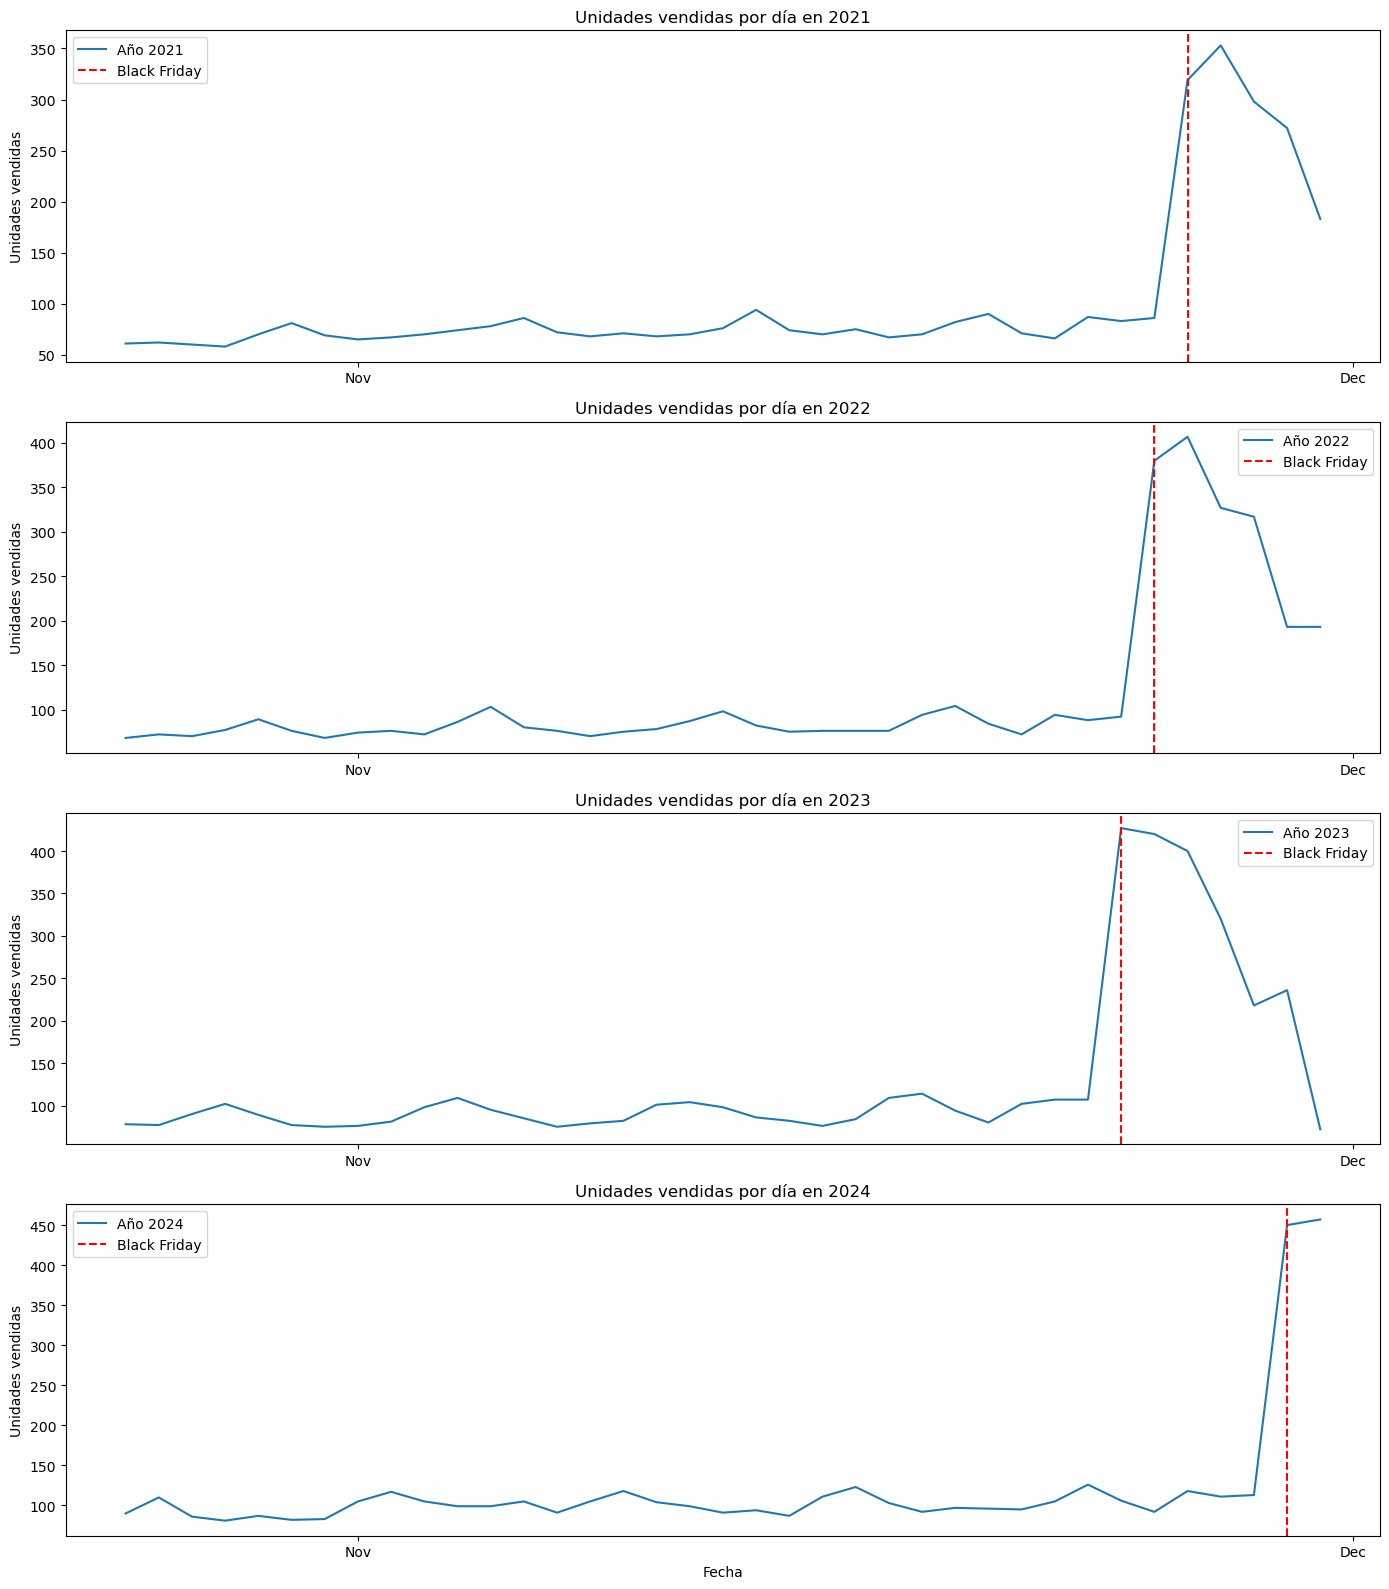

In [8]:
# 🤖 Gráfico de líneas temporales por año con suma de unidades vendidas y Black Fridays
import matplotlib.dates as mdates

# Aseguramos que la columna de fecha sea datetime
if not np.issubdtype(df['fecha'].dtype, np.datetime64):
    df['fecha'] = pd.to_datetime(df['fecha'])

# Identificamos los años únicos
years = df['fecha'].dt.year.unique()

# Fechas de Black Friday (último viernes de noviembre de cada año)
def get_black_friday(year):
    nov = pd.date_range(start=f'{year}-11-01', end=f'{year}-11-30', freq='D')
    return nov[nov.weekday == 4][-1]

fig, axes = plt.subplots(len(years), 1, figsize=(14, 4*len(years)), sharex=False)
if len(years) == 1:
    axes = [axes]
for i, year in enumerate(sorted(years)):
    data_year = df[df['fecha'].dt.year == year]
    data_grouped = data_year.groupby('fecha')['unidades_vendidas'].sum()
    axes[i].plot(data_grouped.index, data_grouped.values, label=f'Año {year}')
    # Marcar Black Friday
    bf = get_black_friday(year)
    axes[i].axvline(bf, color='red', linestyle='--', label='Black Friday')
    axes[i].set_title(f'Unidades vendidas por día en {year}')
    axes[i].set_ylabel('Unidades vendidas')
    axes[i].legend()
    axes[i].xaxis.set_major_locator(mdates.MonthLocator())
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xlabel('Fecha')
plt.tight_layout()
plt.show()

C:\Users\LAURA PEREZ\AppData\Local\Temp\ipykernel_21076\2256879735.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dias, y=suma_dia.values, palette='viridis')


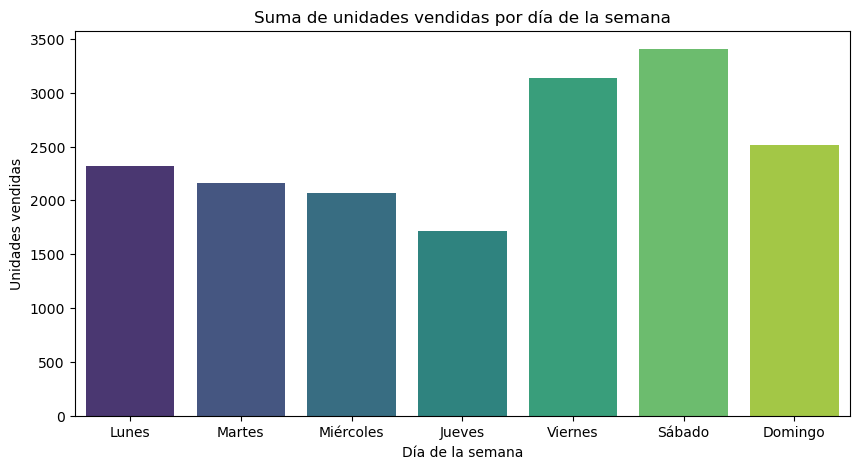

In [9]:
# 🤖 Gráfico de suma de unidades vendidas por día de la semana
# 0=Lunes, 6=Domingo
df['dia_semana'] = df['fecha'].dt.dayofweek
dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
suma_dia = df.groupby('dia_semana')['unidades_vendidas'].sum().reindex(range(7))
plt.figure(figsize=(10,5))
sns.barplot(x=dias, y=suma_dia.values, palette='viridis')
plt.title('Suma de unidades vendidas por día de la semana')
plt.ylabel('Unidades vendidas')
plt.xlabel('Día de la semana')
plt.show()

C:\Users\LAURA PEREZ\AppData\Local\Temp\ipykernel_21076\1728050664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('categoria')['unidades_vendidas'].sum().reset_index().sort_values('unidades_vendidas', ascending=False),


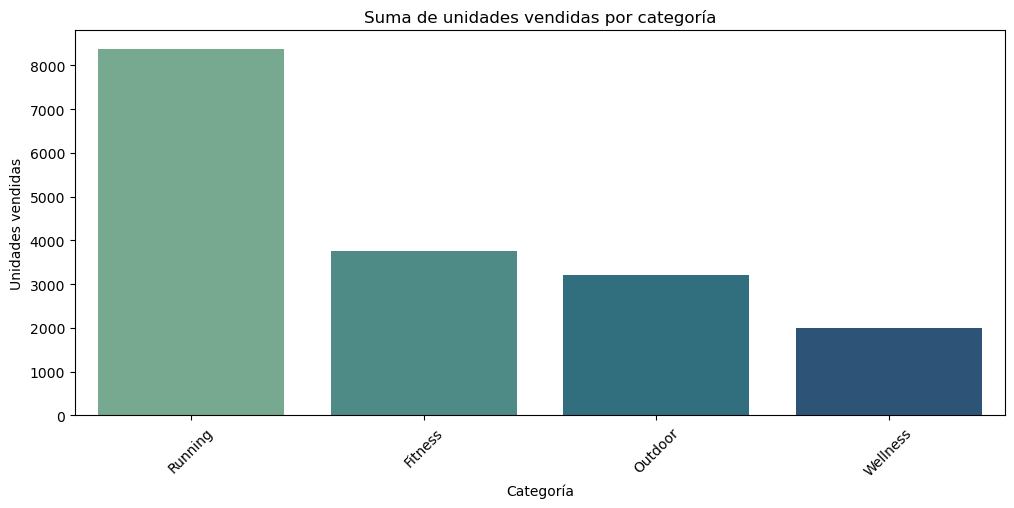

In [10]:
# 🤖 Gráfico de suma de unidades vendidas por categoría
plt.figure(figsize=(12,5))
sns.barplot(data=df.groupby('categoria')['unidades_vendidas'].sum().reset_index().sort_values('unidades_vendidas', ascending=False),
            x='categoria', y='unidades_vendidas', palette='crest')
plt.title('Suma de unidades vendidas por categoría')
plt.ylabel('Unidades vendidas')
plt.xlabel('Categoría')
plt.xticks(rotation=45)
plt.show()

C:\Users\LAURA PEREZ\AppData\Local\Temp\ipykernel_21076\4203752933.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('subcategoria')['unidades_vendidas'].sum().reset_index().sort_values('unidades_vendidas', ascending=False),


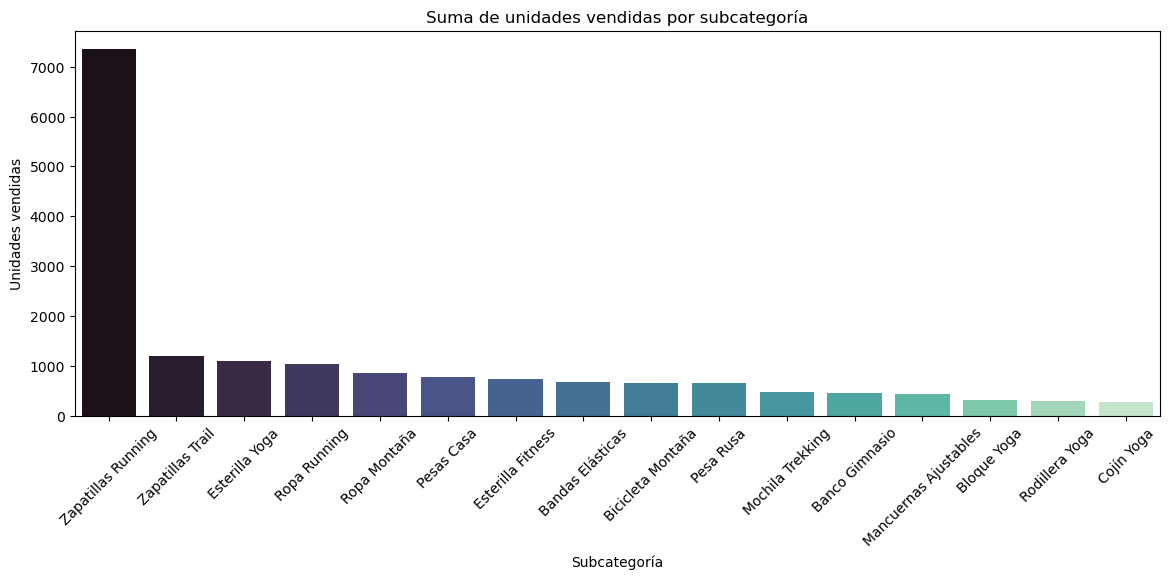

In [11]:
# 🤖 Gráfico de suma de unidades vendidas por subcategoría
plt.figure(figsize=(14,5))
sns.barplot(data=df.groupby('subcategoria')['unidades_vendidas'].sum().reset_index().sort_values('unidades_vendidas', ascending=False),
            x='subcategoria', y='unidades_vendidas', palette='mako')
plt.title('Suma de unidades vendidas por subcategoría')
plt.ylabel('Unidades vendidas')
plt.xlabel('Subcategoría')
plt.xticks(rotation=45)
plt.show()

C:\Users\LAURA PEREZ\AppData\Local\Temp\ipykernel_21076\3368610670.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_productos.index, y=top_productos.values, palette='rocket')


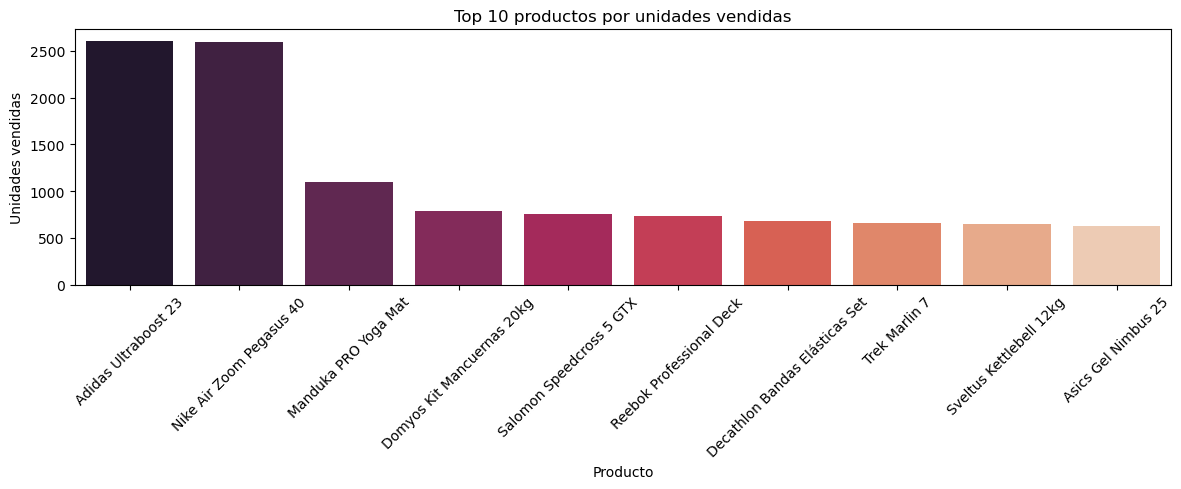

In [13]:
# 🤖 Gráfico de los top productos por unidades vendidas
TOP_N = 10  # Número de productos a mostrar

# Agrupar y ordenar los productos por unidades vendidas
top_productos = df.groupby('nombre')['unidades_vendidas'].sum().sort_values(ascending=False).head(TOP_N)
plt.figure(figsize=(12,5))
sns.barplot(x=top_productos.index, y=top_productos.values, palette='rocket')
plt.title(f'Top {TOP_N} productos por unidades vendidas')
plt.ylabel('Unidades vendidas')
plt.xlabel('Producto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

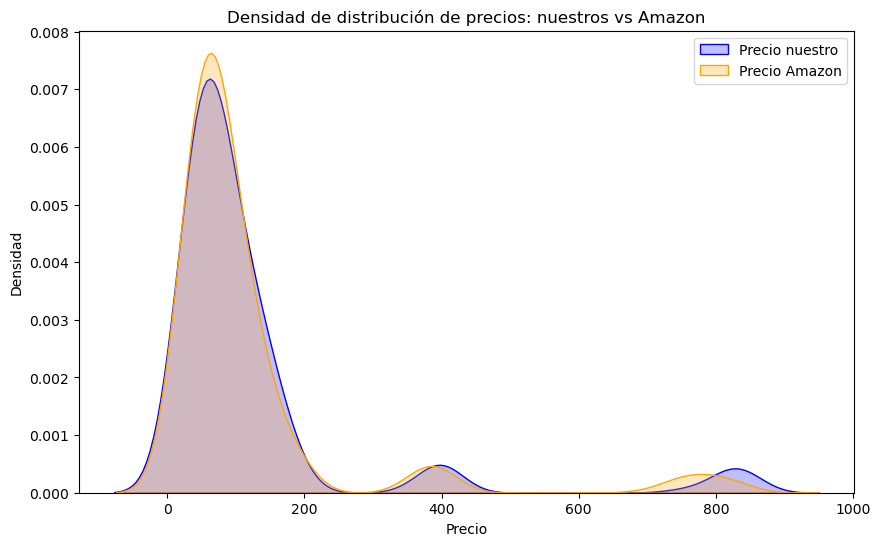

In [15]:
# 🤖 Análisis de densidad de precios: nuestros vs Amazon (competencia)
plt.figure(figsize=(10,6))
sns.kdeplot(df['precio_venta'], label='Precio nuestro', fill=True, color='blue')
sns.kdeplot(df['Amazon'], label='Precio Amazon', fill=True, color='orange')
plt.title('Densidad de distribución de precios: nuestros vs Amazon')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [16]:
# 🤖 Creación de variables temporales y de calendario
import holidays
import numpy as np
import pandas as pd

# Asegúrate de que la columna de fecha se llama 'fecha' y es tipo datetime
if not np.issubdtype(df['fecha'].dtype, np.datetime64):
    df['fecha'] = pd.to_datetime(df['fecha'])

# Variables de calendario
df['anio'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['dia_mes'] = df['fecha'].dt.day
df['dia_semana'] = df['fecha'].dt.weekday  # 0=Lunes, 6=Domingo

df['es_fin_semana'] = df['dia_semana'].isin([5, 6]).astype(int)

# Festivos en España
festivos = holidays.country_holidays('ES', years=df['anio'].unique())
df['es_festivo'] = df['fecha'].isin(festivos).astype(int)

# Black Friday (último viernes de noviembre)
def es_black_friday(fecha):
    if fecha.month == 11:
        # Encuentra el último viernes de noviembre
        ultimo_viernes = max([d for d in pd.date_range(start=fecha.replace(day=1), end=fecha.replace(day=30), freq='D') if d.weekday() == 4])
        return int(fecha == ultimo_viernes)
    return 0

df['es_Black_Friday'] = df['fecha'].apply(es_black_friday)

# Cyber Monday (primer lunes después de Black Friday)
def es_cyber_monday(fecha):
    if fecha.month == 11 or fecha.month == 12:
        # Encuentra el último viernes de noviembre
        nov = fecha.replace(month=11, day=1)
        ultimo_viernes = max([d for d in pd.date_range(start=nov, end=nov.replace(day=30), freq='D') if d.weekday() == 4])
        primer_lunes = ultimo_viernes + pd.Timedelta(days=(7 - ultimo_viernes.weekday()) % 7 + 3)  # Lunes siguiente
        return int(fecha == primer_lunes)
    return 0

df['es_Cyber_Monday'] = df['fecha'].apply(es_cyber_monday)

# Variables adicionales interesantes
# Día del año
df['dia_anio'] = df['fecha'].dt.dayofyear
# Semana del año
df['semana_anio'] = df['fecha'].dt.isocalendar().week
# Primer día del mes
df['es_primer_dia_mes'] = (df['dia_mes'] == 1).astype(int)
# Último día del mes
ultimo_dia_mes = df['fecha'] + pd.offsets.MonthEnd(0)
df['es_ultimo_dia_mes'] = (df['fecha'] == ultimo_dia_mes).astype(int)
# Trimestre
df['trimestre'] = df['fecha'].dt.quarter
# Es festivo o fin de semana
df['es_festivo_o_finsemana'] = ((df['es_festivo'] == 1) | (df['es_fin_semana'] == 1)).astype(int)

# Puedes agregar más variables según el contexto del negocio

df.head()

C:\Users\LAURA PEREZ\AppData\Local\Temp\ipykernel_21076\1612676601.py:20: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['es_festivo'] = df['fecha'].isin(festivos).astype(int)


,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,es_fin_semana,es_festivo,es_Black_Friday,es_Cyber_Monday,dia_anio,semana_anio,es_primer_dia_mes,es_ultimo_dia_mes,trimestre,es_festivo_o_finsemana
0,2021-10-25,PROD_001,Nike Air Zoom Pegasus 40,Running,Zapatillas Running,115,True,6,118.36,710.16,...,0,0,0,0,298,43,0,0,4,0
1,2021-10-25,PROD_002,Adidas Ultraboost 23,Running,Zapatillas Running,135,True,10,136.82,1368.20,...,0,0,0,0,298,43,0,0,4,0
2,2021-10-25,PROD_003,Asics Gel Nimbus 25,Running,Zapatillas Running,85,False,2,84.93,169.86,...,0,0,0,0,298,43,0,0,4,0
3,2021-10-25,PROD_004,New Balance Fresh Foam X 1080v12,Running,Zapatillas Running,75,False,2,75.42,150.84,...,0,0,0,0,298,43,0,0,4,0
4,2021-10-25,PROD_005,Nike Dri-FIT Miler,Running,Ropa Running,35,False,2,35.87,71.74,...,0,0,0,0,298,43,0,0,4,0


In [17]:
# 🤖 Creación de LAGs y media móvil de 7 días para unidades vendidas
# Se asume que la columna de unidades vendidas se llama 'unidades_vendidas'
# Si tiene otro nombre, reemplázalo en el siguiente código

# Ordenar por fecha y año para asegurar el orden correcto
df = df.sort_values(['anio', 'fecha'])

# Crear los LAGs y la media móvil por año
def crear_lags_y_media(df):
    df_lags = []
    for anio, grupo in df.groupby('anio'):
        grupo = grupo.sort_values('fecha')
        for lag in range(1, 8):
            grupo[f'lag_{lag}'] = grupo['unidades_vendidas'].shift(lag)
        grupo['media_movil_7d'] = grupo['unidades_vendidas'].rolling(window=7).mean()
        df_lags.append(grupo)
    return pd.concat(df_lags)

df = crear_lags_y_media(df)

# Eliminar registros con nulos en los nuevos LAGs o media móvil
df = df.dropna(subset=[f'lag_{i}' for i in range(1,8)] + ['media_movil_7d'])

df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,trimestre,es_festivo_o_finsemana,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,media_movil_7d
16,2021-10-25,PROD_017,The North Face Borealis,Outdoor,Mochila Trekking,95,False,1,96.56,96.56,...,4,0,1.0,2.0,5.0,1.0,1.0,1.0,6.0,1.714286
15,2021-10-25,PROD_016,Trek Marlin 7,Outdoor,Bicicleta Montaña,830,True,2,821.29,1642.58,...,4,0,1.0,1.0,2.0,5.0,1.0,1.0,1.0,1.857143
14,2021-10-25,PROD_015,Salomon Speedcross 5 GTX,Outdoor,Zapatillas Trail,150,True,3,154.22,462.66,...,4,0,2.0,1.0,1.0,2.0,5.0,1.0,1.0,2.142857
13,2021-10-25,PROD_014,Sveltus Kettlebell 12kg,Fitness,Pesa Rusa,40,False,2,39.74,79.48,...,4,0,3.0,2.0,1.0,1.0,2.0,5.0,1.0,2.285714
12,2021-10-25,PROD_013,Decathlon Bandas Elásticas Set,Fitness,Bandas Elásticas,25,False,2,24.79,49.58,...,4,0,2.0,3.0,2.0,1.0,1.0,2.0,5.0,1.857143


In [18]:
# 🤖 Crear variable porcentaje descuento
# Se asume que las columnas se llaman 'precio_venta' y 'precio_base'
df['porcentaje_descuento'] = ((df['precio_venta'] - df['precio_base']) / df['precio_base']) * 100

df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,es_festivo_o_finsemana,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,media_movil_7d,porcentaje_descuento
16,2021-10-25,PROD_017,The North Face Borealis,Outdoor,Mochila Trekking,95,False,1,96.56,96.56,...,0,1.0,2.0,5.0,1.0,1.0,1.0,6.0,1.714286,1.642105
15,2021-10-25,PROD_016,Trek Marlin 7,Outdoor,Bicicleta Montaña,830,True,2,821.29,1642.58,...,0,1.0,1.0,2.0,5.0,1.0,1.0,1.0,1.857143,-1.049398
14,2021-10-25,PROD_015,Salomon Speedcross 5 GTX,Outdoor,Zapatillas Trail,150,True,3,154.22,462.66,...,0,2.0,1.0,1.0,2.0,5.0,1.0,1.0,2.142857,2.813333
13,2021-10-25,PROD_014,Sveltus Kettlebell 12kg,Fitness,Pesa Rusa,40,False,2,39.74,79.48,...,0,3.0,2.0,1.0,1.0,2.0,5.0,1.0,2.285714,-0.650000
12,2021-10-25,PROD_013,Decathlon Bandas Elásticas Set,Fitness,Bandas Elásticas,25,False,2,24.79,49.58,...,0,2.0,3.0,2.0,1.0,1.0,2.0,5.0,1.857143,-0.840000


In [19]:
# 🤖 Crear variable precio_competencia y ratio_precio
competidores = ['Amazon', 'Decathlon', 'Deporvillage']
df['precio_competencia'] = df[competidores].mean(axis=1)
df['ratio_precio'] = df['precio_venta'] / df['precio_competencia']
df = df.drop(columns=competidores)
df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,media_movil_7d,porcentaje_descuento,precio_competencia,ratio_precio
16,2021-10-25,PROD_017,The North Face Borealis,Outdoor,Mochila Trekking,95,False,1,96.56,96.56,...,2.0,5.0,1.0,1.0,1.0,6.0,1.714286,1.642105,92.636667,1.042352
15,2021-10-25,PROD_016,Trek Marlin 7,Outdoor,Bicicleta Montaña,830,True,2,821.29,1642.58,...,1.0,2.0,5.0,1.0,1.0,1.0,1.857143,-1.049398,735.070000,1.117295
14,2021-10-25,PROD_015,Salomon Speedcross 5 GTX,Outdoor,Zapatillas Trail,150,True,3,154.22,462.66,...,1.0,1.0,2.0,5.0,1.0,1.0,2.142857,2.813333,135.673333,1.136701
13,2021-10-25,PROD_014,Sveltus Kettlebell 12kg,Fitness,Pesa Rusa,40,False,2,39.74,79.48,...,2.0,1.0,1.0,2.0,5.0,1.0,2.285714,-0.650000,39.460000,1.007096
12,2021-10-25,PROD_013,Decathlon Bandas Elásticas Set,Fitness,Bandas Elásticas,25,False,2,24.79,49.58,...,3.0,2.0,1.0,1.0,2.0,5.0,1.857143,-0.840000,24.096667,1.028773


In [20]:
# 🤖 Copia de variables y One-hot encoding
# Crear copias con sufijo _h
df['nombre_h'] = df['nombre']
df['categoria_h'] = df['categoria']
df['subcategoria_h'] = df['subcategoria']

# One-hot encoding
df = pd.get_dummies(df, columns=['nombre_h', 'categoria_h', 'subcategoria_h'], drop_first=False)
df.head()

,fecha,producto_id,nombre,categoria,subcategoria,precio_base,es_estrella,unidades_vendidas,precio_venta,ingresos,...,subcategoria_h_Esterilla Yoga,subcategoria_h_Mancuernas Ajustables,subcategoria_h_Mochila Trekking,subcategoria_h_Pesa Rusa,subcategoria_h_Pesas Casa,subcategoria_h_Rodillera Yoga,subcategoria_h_Ropa Montaña,subcategoria_h_Ropa Running,subcategoria_h_Zapatillas Running,subcategoria_h_Zapatillas Trail
16,2021-10-25,PROD_017,The North Face Borealis,Outdoor,Mochila Trekking,95,False,1,96.56,96.56,...,False,False,True,False,False,False,False,False,False,False
15,2021-10-25,PROD_016,Trek Marlin 7,Outdoor,Bicicleta Montaña,830,True,2,821.29,1642.58,...,False,False,False,False,False,False,False,False,False,False
14,2021-10-25,PROD_015,Salomon Speedcross 5 GTX,Outdoor,Zapatillas Trail,150,True,3,154.22,462.66,...,False,False,False,False,False,False,False,False,False,True
13,2021-10-25,PROD_014,Sveltus Kettlebell 12kg,Fitness,Pesa Rusa,40,False,2,39.74,79.48,...,False,False,False,True,False,False,False,False,False,False
12,2021-10-25,PROD_013,Decathlon Bandas Elásticas Set,Fitness,Bandas Elásticas,25,False,2,24.79,49.58,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# 🤖 Guardar el dataframe df en la carpeta data/processed
df.to_csv('../data/processed/df.csv', index=False)
print('Archivo guardado en data/processed/df.csv')

Archivo guardado en data/processed/df.csv


In [23]:
# 🤖 Entrenamiento HistGradientBoostingRegressor y baseline
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Selección de variables predictoras (todas menos fecha, ingresos, object y target)
def get_predictors(df):
    exclude = ['fecha', 'ingresos', 'unidades_vendidas']
    return [col for col in df.columns if col not in exclude and df[col].dtype != 'O']

X_train = train_df[get_predictors(train_df)]
y_train = train_df['unidades_vendidas']
X_val = validation_df[get_predictors(validation_df)]
y_val = validation_df['unidades_vendidas']

# Modelo conservador para evitar overfitting
hgb = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_iter=300,
    max_depth=7,
    l2_regularization=1.0,
    random_state=42
)
hgb.fit(X_train, y_train)
y_pred = hgb.predict(X_val)

# Baseline naive: predice la media del train
baseline_pred = np.full_like(y_val, y_train.mean(), dtype=float)

# Métricas
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

mae_base = mean_absolute_error(y_val, baseline_pred)
mse_base = mean_squared_error(y_val, baseline_pred)
rmse_base = np.sqrt(mse_base)
r2_base = r2_score(y_val, baseline_pred)

print('--- HistGradientBoostingRegressor ---')
print(f'MAE:  {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2:   {r2:.2f}')
print('\n--- Baseline Naive (media) ---')
print(f'MAE:  {mae_base:.2f}')
print(f'RMSE: {rmse_base:.2f}')
print(f'R2:   {r2_base:.2f}')

--- HistGradientBoostingRegressor ---
MAE:  0.90
RMSE: 1.85
R2:   0.91

--- Baseline Naive (media) ---
MAE:  3.35
RMSE: 6.26
R2:   -0.00


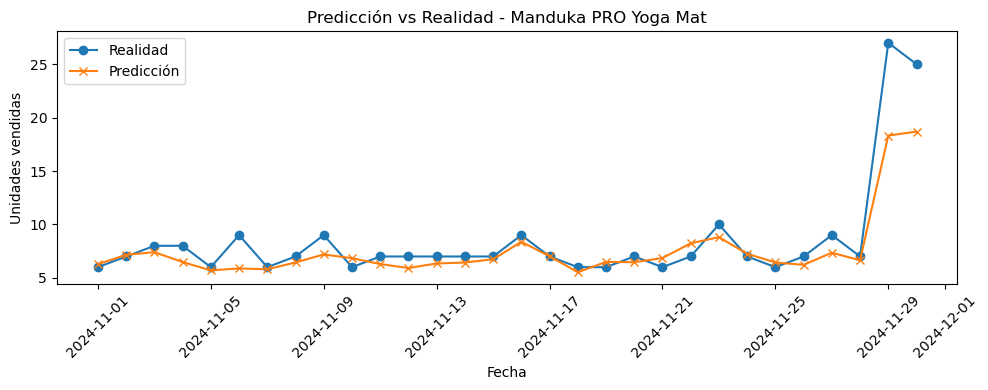

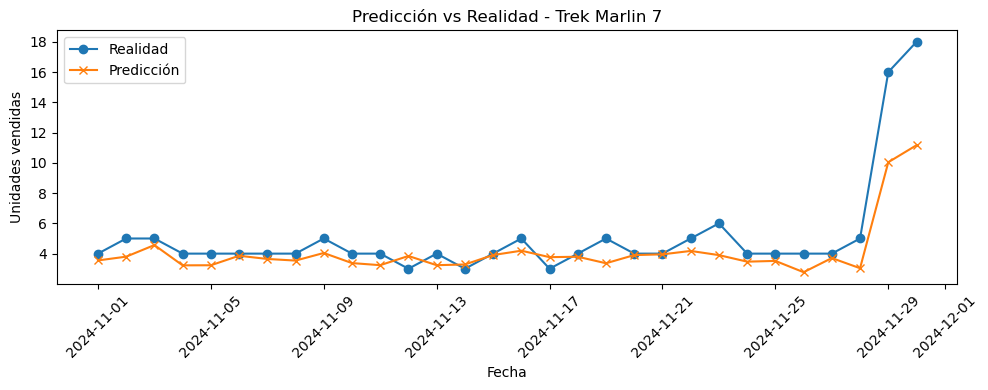

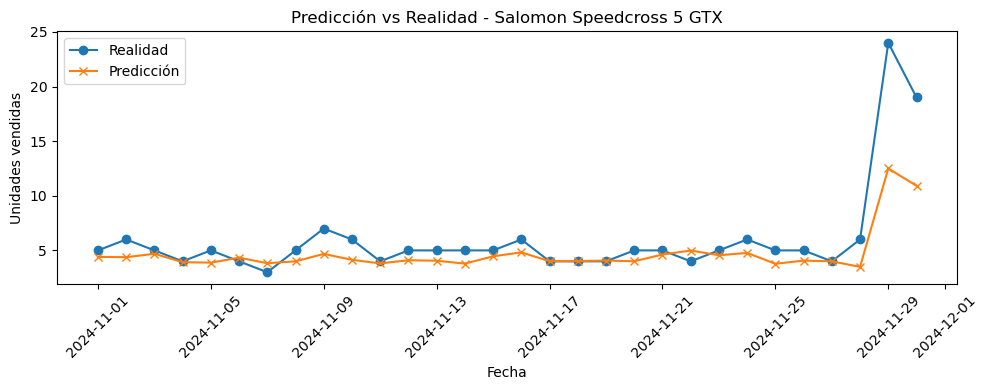

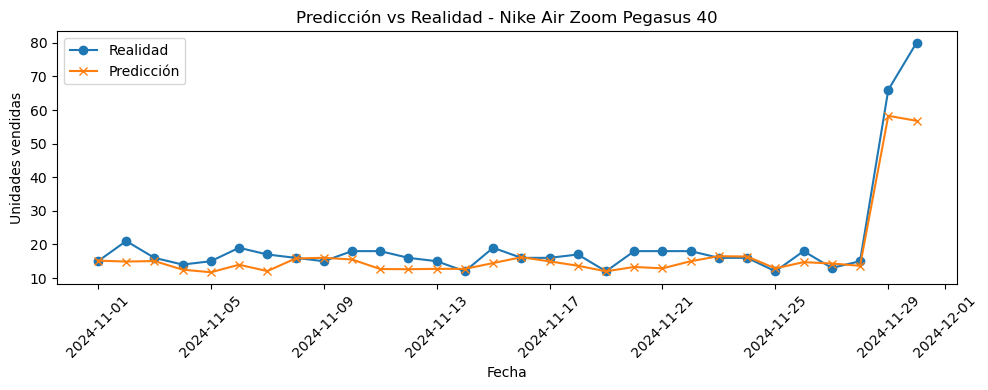

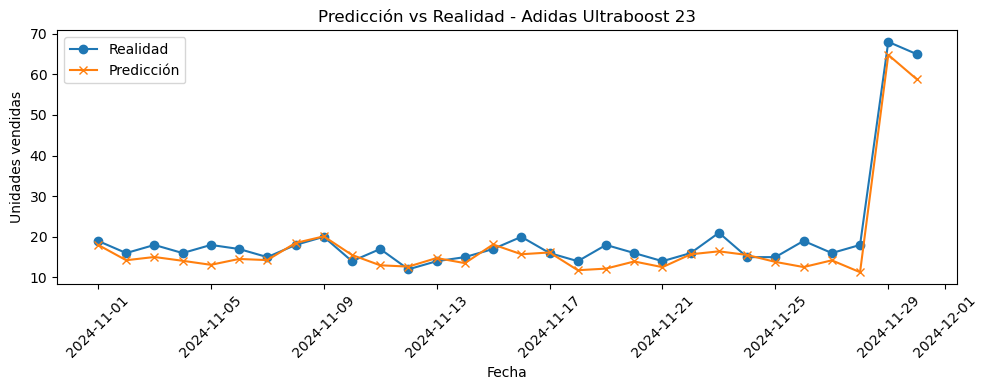

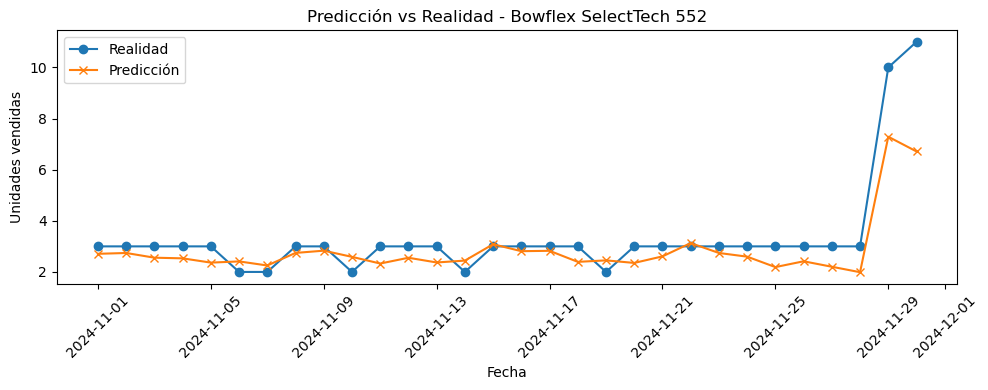

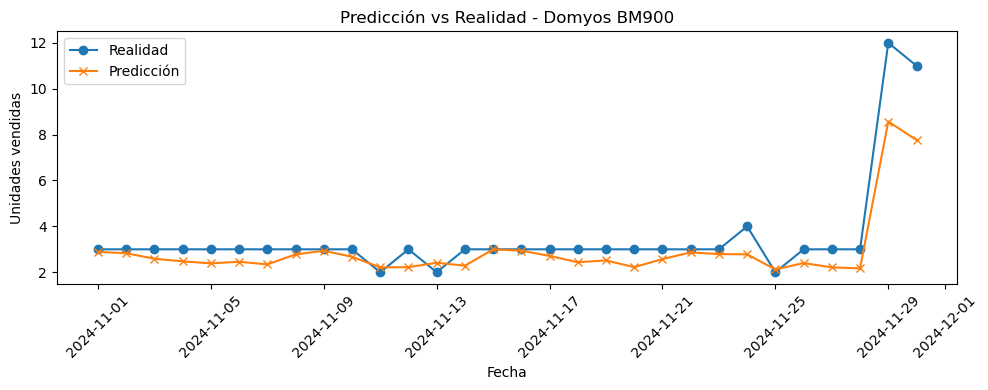

In [24]:
# 🤖 Predicción y gráficos para productos estrella en noviembre 2024
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar noviembre 2024 y productos estrella
df_nov = df[(df['anio'] == 2024) & (df['mes'] == 11) & (df['es_estrella'] == 1)]
productos_estrella = df_nov['nombre'].unique()

for producto in productos_estrella:
    df_prod = df_nov[df_nov['nombre'] == producto].copy()
    X_prod = df_prod[[col for col in df_prod.columns if col not in ['fecha', 'ingresos', 'unidades_vendidas'] and df_prod[col].dtype != 'O']]
    df_prod['prediccion'] = hgb.predict(X_prod)
    plt.figure(figsize=(10,4))
    plt.plot(df_prod['fecha'], df_prod['unidades_vendidas'], label='Realidad', marker='o')
    plt.plot(df_prod['fecha'], df_prod['prediccion'], label='Predicción', marker='x')
    plt.title(f'Predicción vs Realidad - {producto}')
    plt.xlabel('Fecha')
    plt.ylabel('Unidades vendidas')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [25]:
# 🤖 MAE para cada producto estrella en noviembre 2024
from sklearn.metrics import mean_absolute_error

mae_por_producto = {}
for producto in productos_estrella:
    df_prod = df_nov[df_nov['nombre'] == producto].copy()
    X_prod = df_prod[[col for col in df_prod.columns if col not in ['fecha', 'ingresos', 'unidades_vendidas'] and df_prod[col].dtype != 'O']]
    y_true = df_prod['unidades_vendidas']
    y_pred = hgb.predict(X_prod)
    mae = mean_absolute_error(y_true, y_pred)
    mae_por_producto[producto] = mae

for producto, mae in mae_por_producto.items():
    print(f"Producto: {producto:40s}  MAE: {mae:.2f}")

Producto: Manduka PRO Yoga Mat                      MAE: 1.22
Producto: Trek Marlin 7                             MAE: 1.09
Producto: Salomon Speedcross 5 GTX                  MAE: 1.45
Producto: Nike Air Zoom Pegasus 40                  MAE: 3.27
Producto: Adidas Ultraboost 23                      MAE: 2.43
Producto: Bowflex SelectTech 552                    MAE: 0.65
Producto: Domyos BM900                              MAE: 0.63


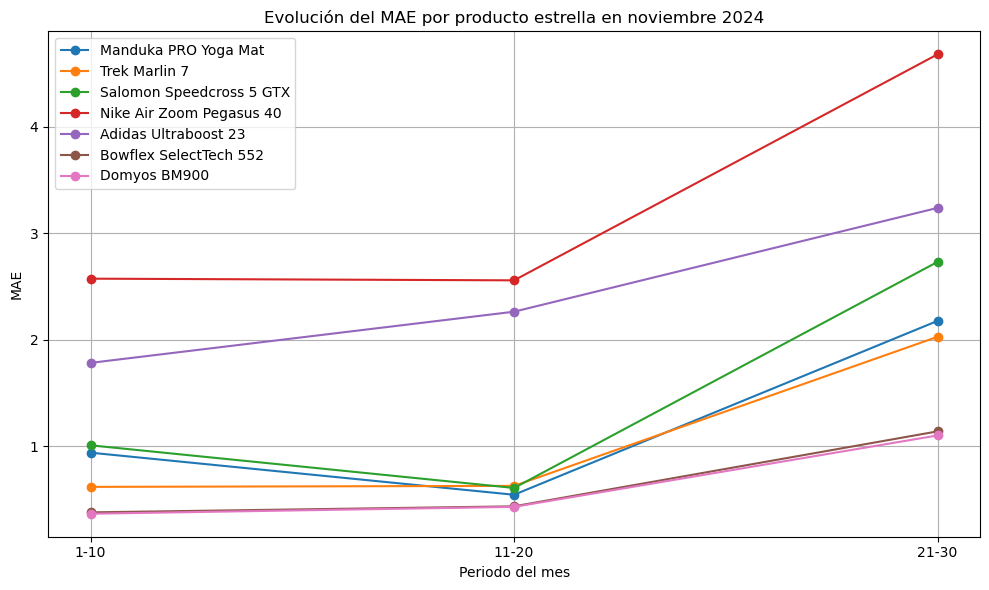

In [27]:
# 🤖 Análisis de degradación del error en noviembre 2024 por periodos de 10 días, una línea por producto

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

periodos = [(1,10), (11,20), (21,30)]
mae_periodos_producto = {}

for producto in productos_estrella:
    df_prod = df_nov[df_nov['nombre'] == producto].copy()
    X_prod = df_prod[[col for col in df_prod.columns if col not in ['fecha', 'ingresos', 'unidades_vendidas'] and df_prod[col].dtype != 'O']]
    df_prod['prediccion'] = hgb.predict(X_prod)
    df_prod['dia_mes'] = df_prod['dia_mes'].astype(int)
    maes = []
    for ini, fin in periodos:
        mask = (df_prod['dia_mes'] >= ini) & (df_prod['dia_mes'] <= fin)
        if mask.sum() > 0:
            mae = mean_absolute_error(df_prod.loc[mask, 'unidades_vendidas'], df_prod.loc[mask, 'prediccion'])
            maes.append(mae)
        else:
            maes.append(np.nan)
    mae_periodos_producto[producto] = maes

plt.figure(figsize=(10,6))
for producto, maes in mae_periodos_producto.items():
    plt.plot(["1-10", "11-20", "21-30"], maes, marker='o', label=producto)
plt.title('Evolución del MAE por producto estrella en noviembre 2024')
plt.xlabel('Periodo del mes')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


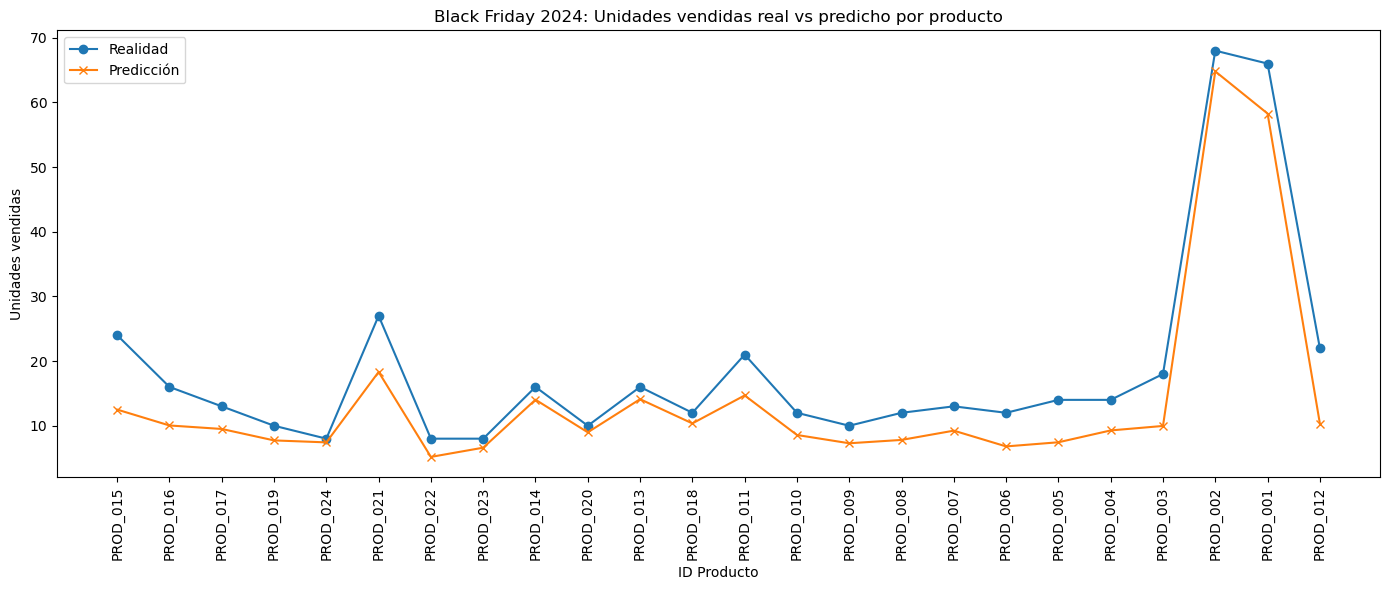

In [28]:
# 🤖 Análisis Black Friday 2024: Real vs Predicho para todos los productos
import matplotlib.pyplot as plt

# Filtrar Black Friday 2024
df_bf = df[(df['anio'] == 2024) & (df['es_Black_Friday'] == 1)]

# Preparar datos para predicción
X_bf = df_bf[[col for col in df_bf.columns if col not in ['fecha', 'ingresos', 'unidades_vendidas'] and df_bf[col].dtype != 'O']]
y_bf_real = df_bf['unidades_vendidas']
y_bf_pred = hgb.predict(X_bf)

# Gráfico
plt.figure(figsize=(14,6))
plt.plot(df_bf['producto_id'], y_bf_real, label='Realidad', marker='o')
plt.plot(df_bf['producto_id'], y_bf_pred, label='Predicción', marker='x')
plt.title('Black Friday 2024: Unidades vendidas real vs predicho por producto')
plt.xlabel('ID Producto')
plt.ylabel('Unidades vendidas')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [29]:
# 🤖 Reentrenamiento del modelo final con todos los datos históricos (2021-2024)
from sklearn.ensemble import HistGradientBoostingRegressor

def get_predictors(df):
    exclude = ['fecha', 'ingresos', 'unidades_vendidas']
    return [col for col in df.columns if col not in exclude and df[col].dtype != 'O']

# Filtrar datos de 2021 a 2024
df_hist = df[(df['anio'] >= 2021) & (df['anio'] <= 2024)]
X_full = df_hist[get_predictors(df_hist)]
y_full = df_hist['unidades_vendidas']

hgb_final = HistGradientBoostingRegressor(
    learning_rate=0.05,
    max_iter=300,
    max_depth=7,
    l2_regularization=1.0,
    random_state=42
)
hgb_final.fit(X_full, y_full)
print('Modelo final HistGradientBoostingRegressor entrenado con todos los datos históricos (2021-2024).')

Modelo final HistGradientBoostingRegressor entrenado con todos los datos históricos (2021-2024).


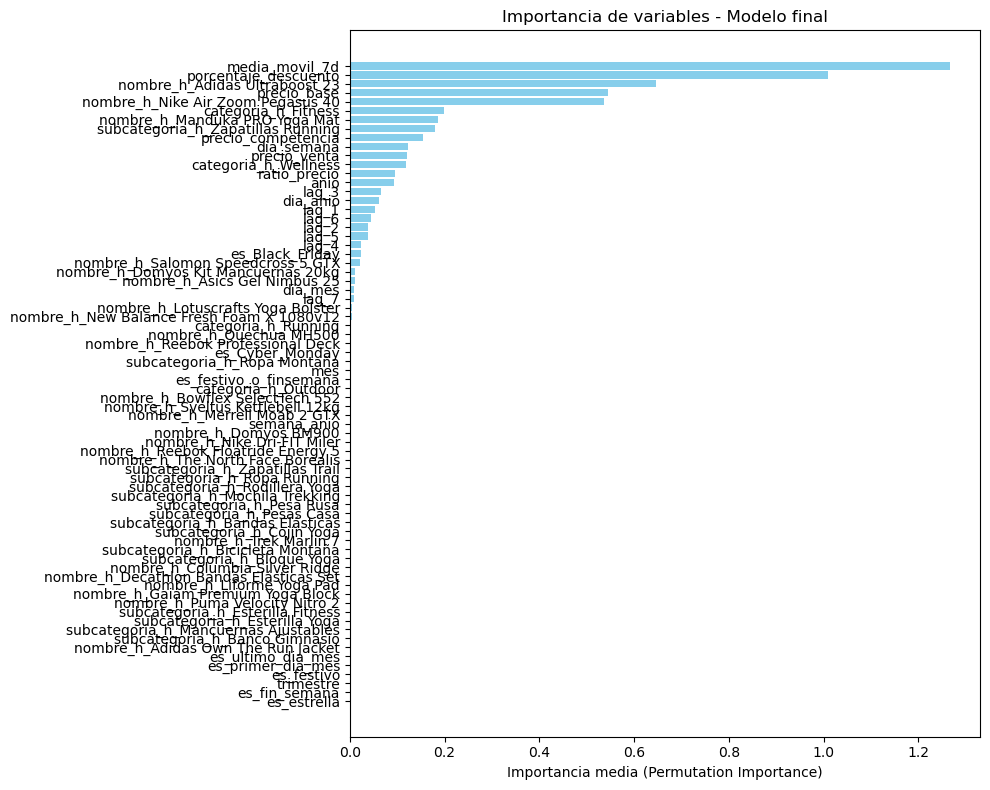

In [33]:
# 🤖 Importancia de variables con permutation importance (modelo final)
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Calcular permutation importance
result = permutation_importance(hgb_final, X_full, y_full, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importancias = result.importances_mean
features = X_full.columns

# Ordenar de mayor a menor
indices = np.argsort(importancias)[::-1]
features_sorted = features[indices]
importancias_sorted = importancias[indices]

# Gráfico de barras horizontales
plt.figure(figsize=(10,8))
plt.barh(features_sorted, importancias_sorted, color='skyblue')
plt.xlabel('Importancia media (Permutation Importance)')
plt.title('Importancia de variables - Modelo final')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [34]:
# 🤖 Guardar el modelo final en la carpeta models
import joblib
import os

os.makedirs('models', exist_ok=True)
joblib.dump(hgb_final, 'models/modelo_final.joblib')
print('Modelo final guardado en models/modelo_final.joblib')

Modelo final guardado en models/modelo_final.joblib
